### Retrieve LSTM spectral template with given SN name
- Spectral template is available for each SN in CSD (361 SNe in total).
- Spectral template wavelength coverage: 3800 to 7200 A (resolution 2 A)
- Spectral template phase coverage: -15.0 to +33.0 d (cadence 0.125 d)
- Each spectrum of a spectral template has normalized flux

In [1]:
import os
import sys
import warnings
import numpy as np
from astropy.table import Table
from snail.AccessArchivalData import AccessDB

# FIXME, use your path of the dataset downloaded from Zenodo.
DBDir = '/home/thomas/Lpackages/snail-db'
assert os.path.exists(DBDir)

In [2]:
# ** specify SN
SN_name = 'SN2011by'

In [3]:
# ** check spectral observations in CSD for the SN
AccessDB(SN_name=SN_name, DBDir=DBDir).Search_SpecID(PhaseRange=None, verbose=True)

Spec ID : 21738 (Phase : -11.57 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21740 (Phase : -5.58 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21742 (Phase : -3.59 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 104873 (Phase : -0.24 d) (Tel / Inst : HST / STIS)
Spec ID : 21745 (Phase : 0.40 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21746 (Phase : 4.39 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21747 (Phase : 12.36 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21748 (Phase : 15.36 d) (Tel / Inst : Lick-3m / KAST)
Spec ID : 21749 (Phase : 29.32 d) (Tel / Inst : Lick-3m / KAST)


[21738, 21740, 21742, 104873, 21745, 21746, 21747, 21748, 21749]

In [9]:
# ** retrieve lstm spectral template for the SN
print('Spectral Observations of %s in CSD dataset:\n' %SN_name)
AstSpecLSTM = AccessDB(SN_name=SN_name, DBDir=DBDir).Retrieve_SpecTemplate(evaluate_accuracy=True)
ESurface = np.array(AstSpecLSTM['flux']).reshape((-1, 1700))   # lstm spectral template of SN 2011by
print('\nSNAIL CheckPoint: Spectral Template of %s is retrieved!' %SN_name)
print('# a template is a flux surface with shape (phase_dim, wave_dim) = (%d, %d)' %(ESurface.shape[0], ESurface.shape[1]))
print('# please notice the template accuracy (MAPE error) at different epoch.')
print('# note 10% spectra are not included in the training set to demonstrate model fedility (see Trained = NO).')

Spectral Observations of SN2011by in CSD dataset:

SN name | Obs. Spec_ID | Obs. Phase | Trained | Template MAPE error
[SN2011by] | 21738 | -11.6 d | YES | 2.9 %
[SN2011by] | 21740 | -5.6 d | YES | 1.7 %
[SN2011by] | 21742 | -3.6 d | YES | 2.0 %
[SN2011by] | 104873 | -0.2 d | YES | 1.7 %
[SN2011by] | 21745 | 0.4 d | YES | 2.1 %
[SN2011by] | 21746 | 4.4 d | YES | 2.3 %
[SN2011by] | 21747 | 12.4 d | YES | 2.7 %
[SN2011by] | 21748 | 15.4 d | YES | 6.7 %
[SN2011by] | 21749 | 29.3 d | NO | 3.7 %

SNAIL CheckPoint: Spectral Template of SN2011by is retrieved!
# a template is a flux surface with shape (phase_dim, wave_dim) = (385, 1700)
# please notice the template accuracy (MAPE error) at different epoch.
# note 10% spectra are not included in the training set to demonstrate model fedility (see Trained = NO).


### Figure A: Show the LSTM spectral template

<IPython.core.display.Javascript object>


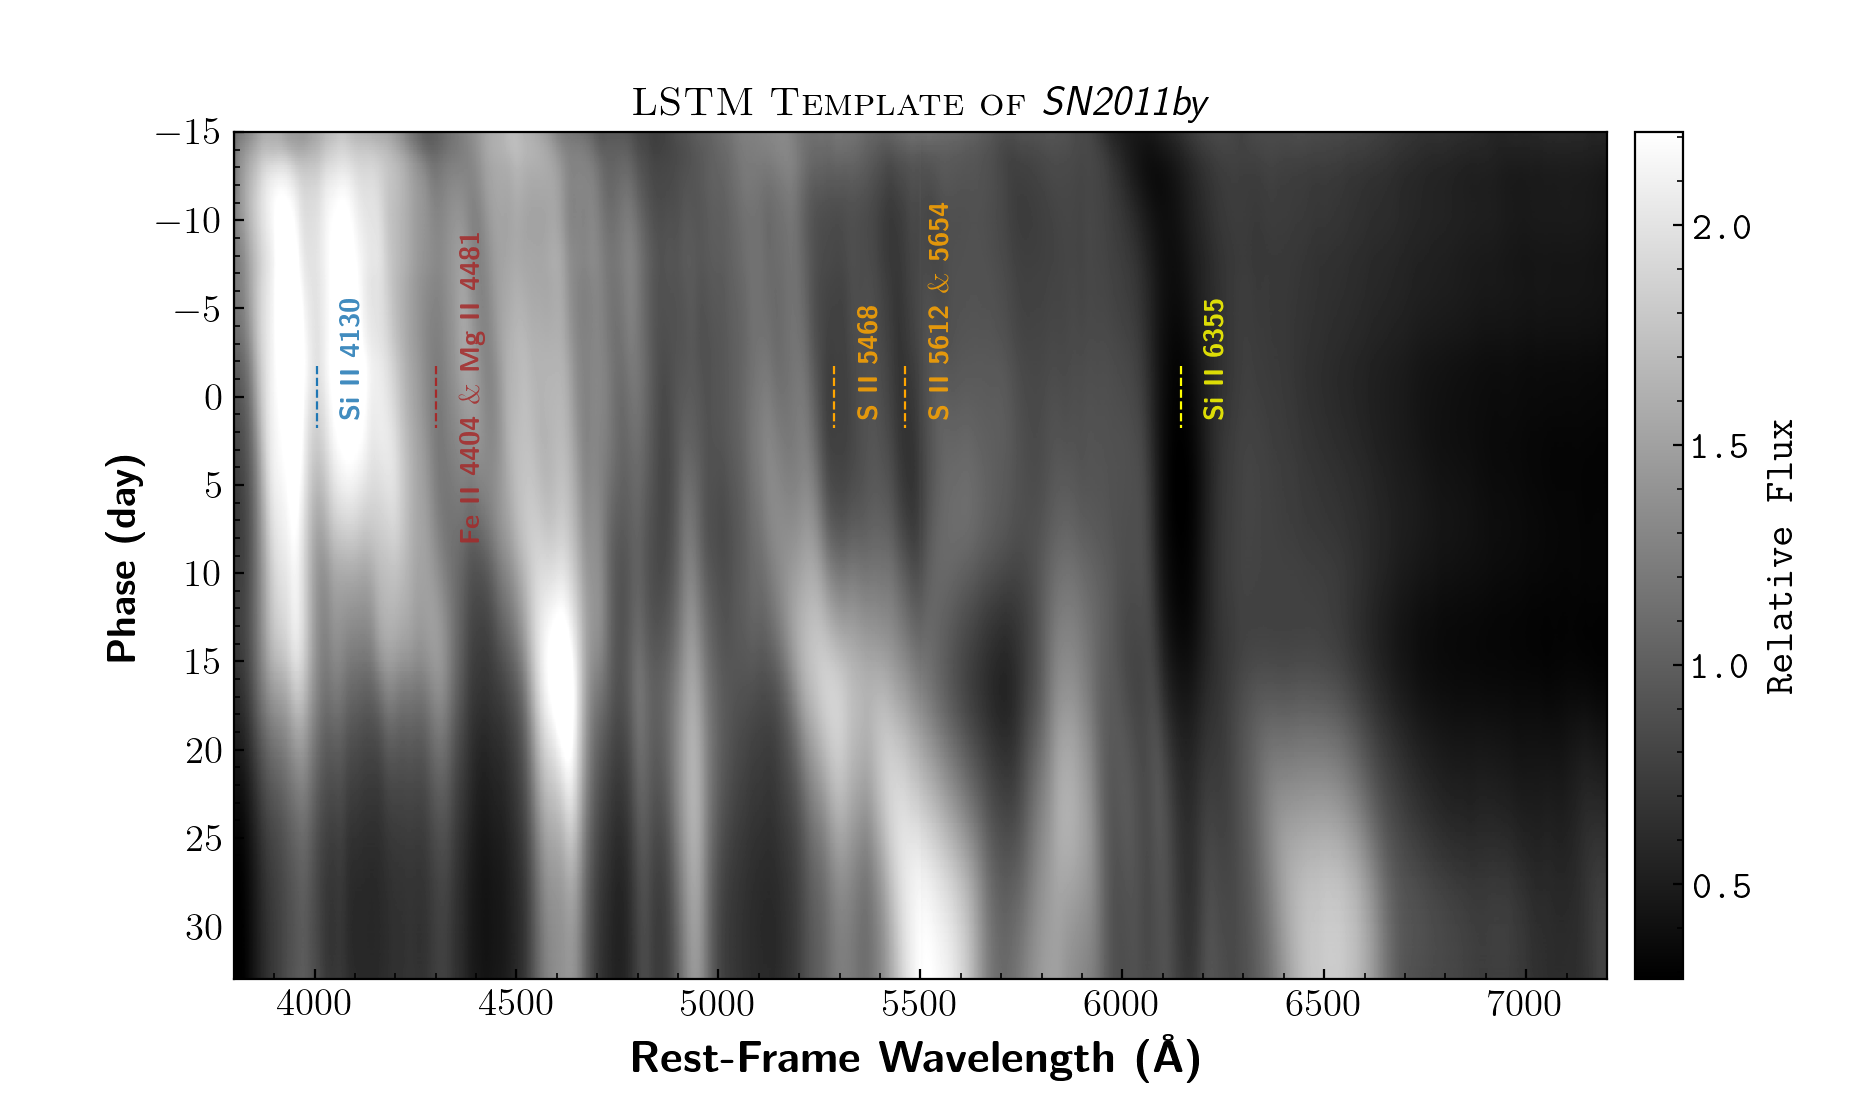

In [6]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from astropy import visualization as vs
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
matplotlib.rc('text', usetex=True)
%matplotlib nbagg

vszs = vs.ZScaleInterval(nsamples=1000, contrast=0.25, \
    max_reject=0.5, min_npixels=5, krej=2.5, max_iterations=5)
vmin, vmax = vszs.get_limits(values=ESurface.flatten())
graycmap = plt.cm.get_cmap('gray')

_cNorm  = colors.Normalize(vmin=vmin, vmax=vmax)
scalarMap_f = cm.ScalarMappable(norm=_cNorm, cmap=graycmap)

def wshift(w0, vel):
    c = 299792.458 # km/s
    v2w = lambda vel: w0/np.sqrt((1+vel/c)/(1-vel/c))
    wbot = v2w(1000*vel)
    return wbot

fig = plt.figure(figsize=(8.5*1.1, 5*1.1))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig.subplots_adjust(hspace=0.1, wspace=0.0)

ax = plt.subplot(111)
ax.imshow(ESurface[::-1], interpolation='none', cmap=graycmap,
    origin='lower', extent=[3800, 7200, 33, -15], aspect='auto', vmin=vmin, vmax=vmax)

# Marks the prominent spectral features
wbot = wshift(6355, 10.1)    # FIXME: only configure with approximate velocity 
ax.vlines(x=wbot, ymin=-1.75, ymax=1.75, linestyle='--', linewidth=0.8, color='yellow')
ax.annotate(r'\textbf{Si II 6355}', xy=(wbot+60, 1), fontsize=10, color='yellow', rotation=90, alpha=0.85)

wbot = wshift((5612+5654)/2.0, 9.2)
ax.vlines(x=wbot, ymin=-1.75, ymax=1.75, linestyle='--', linewidth=0.8, color='orange')
ax.annotate(r'\textbf{S II 5612 $\&$ 5654}', xy=(wbot+60, 1), fontsize=10, color='orange', rotation=90, alpha=0.85)

wbot = wshift(5468, 10.1)
ax.vlines(x=wbot, ymin=-1.75, ymax=1.75, linestyle='--', linewidth=0.8, color='orange')
ax.annotate(r'\textbf{S II 5468}', xy=(wbot+60, 1), fontsize=10, color='orange', rotation=90, alpha=0.85)

wbot = wshift((4404+4481)/2.0, 9.7)
ax.vlines(x=wbot, ymin=-1.75, ymax=1.75, linestyle='--', linewidth=0.8, color='brown')
ax.annotate(r'\textbf{Fe II 4404 $\&$ Mg II 4481}', xy=(wbot+60, 8), fontsize=10, color='brown', rotation=90, alpha=0.85)

wbot = wshift(4130, 9.2)
ax.vlines(x=wbot, ymin=-1.75, ymax=1.75, linestyle='--', linewidth=0.8, color='tab:blue')
ax.annotate(r'\textbf{Si II 4130}', xy=(wbot+60, 1), fontsize=10, color='tab:blue', rotation=90, alpha=0.85)

ax.tick_params(which='both', top=False, bottom=True, left=True, right=False, 
    labelleft=True, labelright=False, labelbottom=True, labeltop=False)

ax.xaxis.set_minor_locator(MultipleLocator(100.0))
ax.xaxis.set_major_locator(MultipleLocator(500.0))
ax.yaxis.set_minor_locator(MultipleLocator(1.0))
ax.yaxis.set_major_locator(MultipleLocator(5.0))

plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)
ax.set_xlabel(r'\textbf{Rest-Frame Wavelength (\AA)}', fontsize=16)
ax.set_ylabel(r'\textbf{Phase (day)}', fontsize=14)
ax.set_xlim(3800, 7200)

_divider = make_axes_locatable(ax)
_cax = _divider.append_axes('right', size='3.5%', pad=0.14)
_cb = fig.colorbar(scalarMap_f, cax=_cax, orientation='vertical')

_Gt = [0.5, 1.0, 1.5, 2.0]  # USER-DEFINED
_clab = [r'\texttt{%.1f}'%x for x in _Gt]

_cb.set_ticks(_Gt)
_cb.ax.set_yticklabels(_clab, fontsize=14)
_cb.ax.set_ylabel(r'\texttt{Relative Flux}', fontsize=15)
_cb.ax.minorticks_on()

ax.set_title(r'\textsc{LSTM Template of }\textit{%s}' %SN_name, fontsize=14.5, color='black')
plt.show()


### Figure B: Compare LSTM spectral template with the real observations 

In [7]:
# ** Retrieve all observations
ObsDICT = {}
SID_LST = AccessDB(SN_name=SN_name, DBDir=DBDir).Search_SpecID(PhaseRange=None, verbose=False)
for sid in SID_LST:
    _dict = AccessDB(SN_name=SN_name, DBDir=DBDir).Spec_Attributes(Spec_ID=sid)
    _ast = AccessDB(SN_name=SN_name, DBDir=DBDir).Retrieve_SpecObs(Spec_ID=sid, data_type='Corrected')
    phase = round(_dict['Phase'], 2)
    ti =  _dict['Tel_Inst'][:4]  # instrument name, truncated to 4 letters for display
    ObsDICT[phase] = {'Spec_ID': sid, 'Tel_Inst': ti, \
                      'wavelength': np.array(_ast['wavelength']), \
                      'flux': np.array(_ast['flux'])}

# ** Retrieve LSTM spectral template
AstSpecLSTM = AccessDB(SN_name=SN_name, DBDir=DBDir).Retrieve_SpecTemplate(evaluate_accuracy=False)
PHASE_LSTM = np.arange(-15.00, 33.01, 1/8.0)

# ** Determine a phase sequence for plot
#    NOTE: here we use a fixed phase grid plus observation phases.
PHASE_GRID = np.array(list(np.arange(-15, +9.99, 1.0)) \
                      + list(np.arange(+10.0, +19.99, 2.0)) \
                      + list(np.arange(+20.0, +29.99, 3.0)) \
                      + [33.0])   # FIXME: you can modify this to be any subset of [-15.0, 33.0]
SID_LST = AccessDB(SN_name=SN_name, DBDir=DBDir).Search_SpecID(PhaseRange=None, verbose=False)
PHASE_OBS = np.array([round(AccessDB(SN_name=SN_name, DBDir=DBDir).Spec_Attributes(Spec_ID=sid)['Phase'], 2) for sid in SID_LST])
DelMask = np.array([np.min(np.abs(PHASE_OBS - phase)) < 1.0 for phase in PHASE_GRID])   # remove grid phase when close observation phase exist. 
PHASE_PLOT = np.sort(np.append(PHASE_GRID[~DelMask], PHASE_OBS))

# ** Collect data for plot
PLOT_DICT = {}
for phase in PHASE_PLOT:
    item = {}
    if phase in ObsDICT: 
        item['OBS:Spec_ID'] = ObsDICT[phase]['Spec_ID']
        item['OBS:Tel_Inst'] = ObsDICT[phase]['Tel_Inst']
        item['OBS:wavelength'] = ObsDICT[phase]['wavelength']
        item['OBS:flux'] = ObsDICT[phase]['flux']
    idx = np.argmin(np.abs(PHASE_LSTM - phase))
    ast = AstSpecLSTM[AstSpecLSTM['index'] == idx]
    item['LSTM:wavelength'] = np.array(ast['wavelength'])
    item['LSTM:flux'] = np.array(ast['flux'])
    PLOT_DICT[phase] = item


<IPython.core.display.Javascript object>


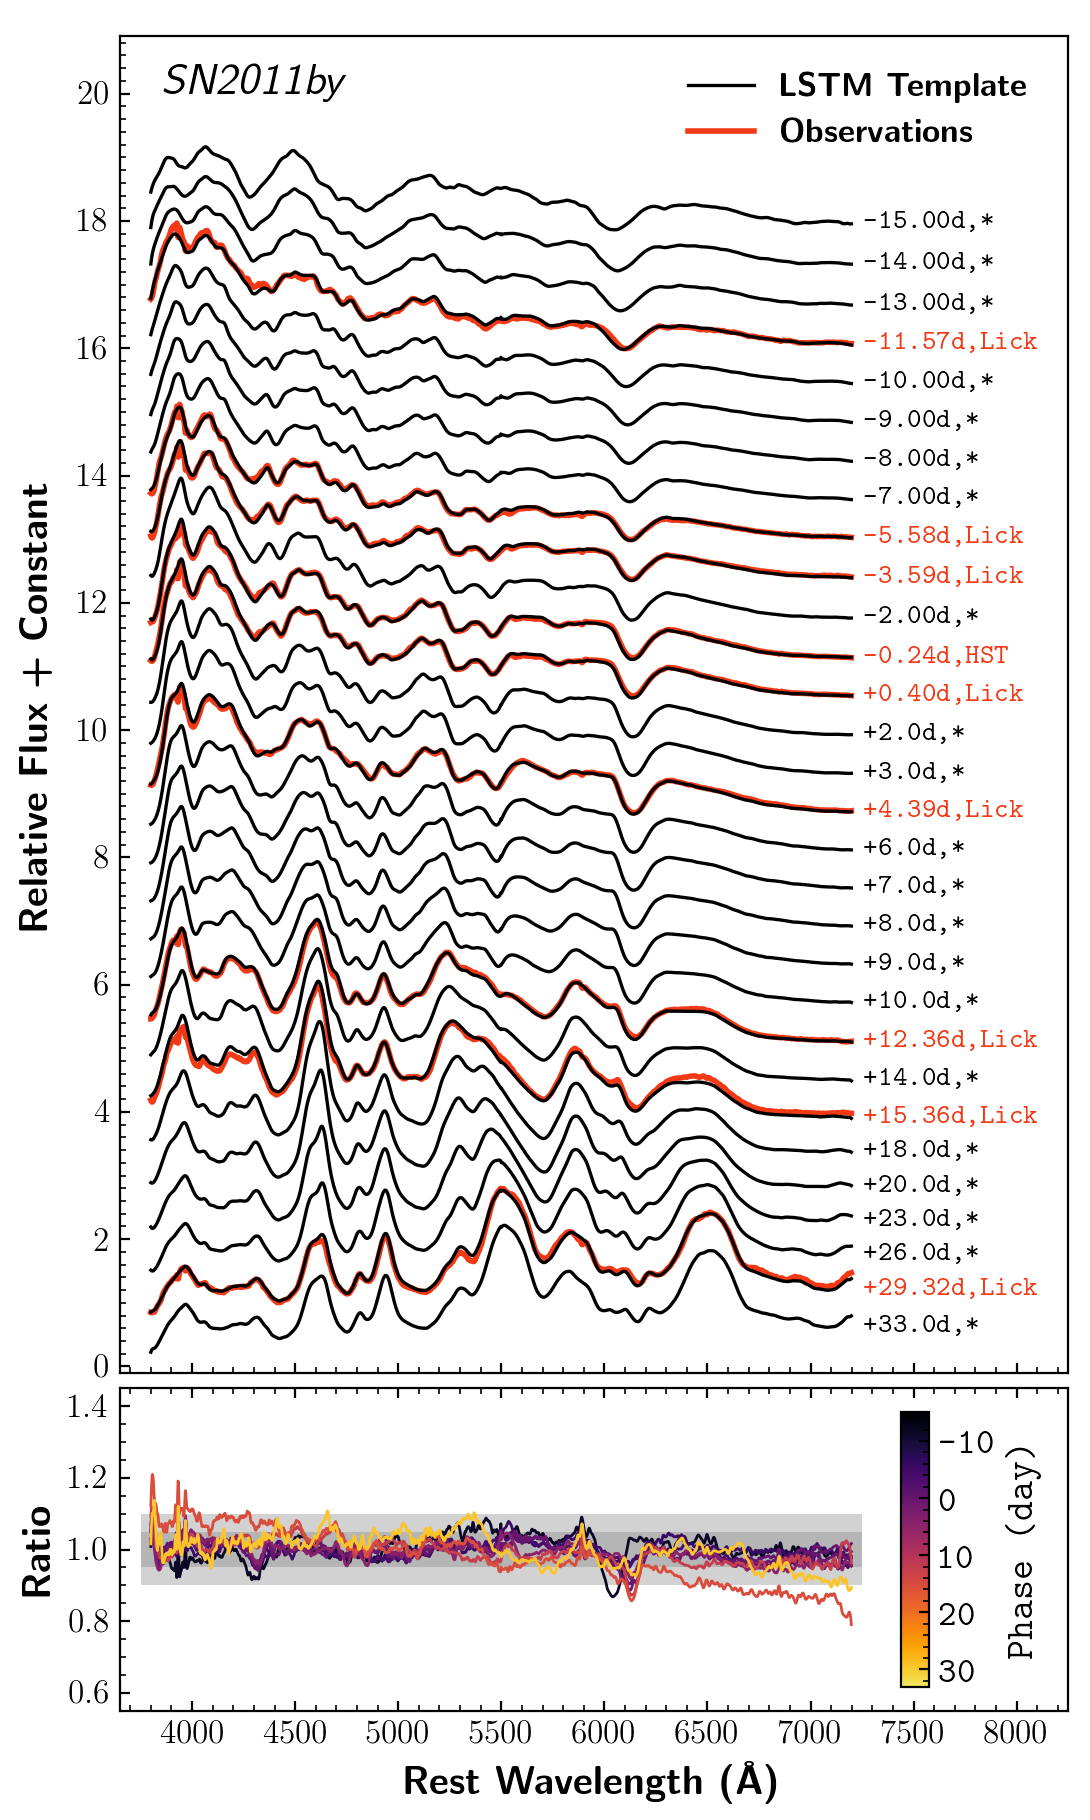

In [8]:
# ** define a color-map for phase
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=1024):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap_inf0 = plt.get_cmap('inferno')
cmap_inf = truncate_colormap(cmap_inf0, minval=0.0, maxval=0.93)
_cNorm  = colors.Normalize(vmin=-15.0, vmax=33.0)
scalarMap_p = cm.ScalarMappable(norm=_cNorm, cmap=cmap_inf)

# ** draw the figure
fig = plt.figure(figsize=(5.45, 9.1))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig.subplots_adjust(hspace=0.1, wspace=0.0, left=0.11, right=0.98, bottom=0.06, top=0.98)

gs = gridspec.GridSpec(10, 1)
axU = plt.subplot(gs[:8, 0])
axL = plt.subplot(gs[8:, 0])

offset = 0.0
for idx in np.arange(len(PHASE_PLOT))[::-1]:
    phase = PHASE_PLOT[idx]
    item = PLOT_DICT[phase]
    Wlstm, Flstm = item['LSTM:wavelength'], item['LSTM:flux']
    axU.plot(Wlstm, offset+Flstm, color='black', linewidth=1.2, alpha=1.0, zorder=2)

    if 'OBS:Spec_ID' in item:
        Wobs, Fobs = item['OBS:wavelength'], item['OBS:flux']
        side_text = '%.2fd' %phase
        if phase > 0: side_text = '+%.2fd' %phase
        side_text = '%s,%s' %(side_text, item['OBS:Tel_Inst'])
        level = np.median(Flstm[-100:])-0.1
        axU.plot(Wobs, offset+Fobs, color='#F23814', linewidth=2.0, alpha=1.0, zorder=1)
        axU.annotate(r'\texttt{%s}' %side_text, xy=(7260, level+offset), fontsize=10.0, color='#F23814')
    else:
        side_text = '%.2fd' %phase
        if phase > 0: side_text = '+%.1fd' %phase
        side_text = '%s,*' %side_text
        level = np.median(Flstm[-100:])-0.1
        axU.annotate(r'\texttt{%s}' %side_text, xy=(7260, level+offset), fontsize=10.0, color='black')
    offset += 0.6

    
axU.plot([10000], [0.0], '-', color='black', linewidth=1.2, alpha=1.0, zorder=3, label=r'\textbf{LSTM Template}')
axU.plot([10000], [0.0], '-', color='#F23814', linewidth=2.0, alpha=1.0, zorder=2, label=r'\textbf{Observations}')
axU.legend(borderpad=0.6, frameon=False, fontsize=12) 
    
axU.set_ylim(-0.1, 20.9)
axU.set_xlim(3650, 8250)

axU.xaxis.set_minor_locator(MultipleLocator(100))
axU.xaxis.set_major_locator(MultipleLocator(500))
axU.yaxis.set_minor_locator(MultipleLocator(0.2))
axU.yaxis.set_major_locator(MultipleLocator(2.0))

#plt.setp(axU.get_xticklabels(), fontsize=12)
plt.setp(axU.get_yticklabels(), fontsize=12)

axU.annotate(r'\textit{%s}' %SN_name, xy=(3860, 20.0), fontsize=16, color='black')
#axU.set_xlabel(r'\textbf{Rest Wavelength (\AA)}', fontsize=14)
axU.set_ylabel(r'\textbf{Relative Flux + Constant}', fontsize=14, labelpad=8)
axU.tick_params(which='both', top=False, bottom=True, left=True, right=False, 
    labelleft=True, labelright=False, labelbottom=False, labeltop=False)

for phase in PHASE_PLOT:
    item = PLOT_DICT[phase]
    if 'OBS:Spec_ID' in item:
        Wlstm, Flstm = item['LSTM:wavelength'], item['LSTM:flux']
        Wobs, Fobs = item['OBS:wavelength'], item['OBS:flux']
        Ratio = Flstm / Fobs
        co = cmap_inf((phase+15.0)/48.0)
        axL.plot(Wobs, Ratio, '-', color=co, linewidth=1.0, alpha=1.0)

axL.fill_between([3750, 7250], [0.95, 0.95], [1.05, 1.05], color='gray', alpha=0.35, linewidth=0)    
axL.fill_between([3750, 7250], [0.9, 0.9], [1.1, 1.1], color='gray', alpha=0.35, linewidth=0)    
axL.set_xlabel(r'\textbf{Rest Wavelength (\AA)}', fontsize=14)
axL.set_ylabel(r'\textbf{Ratio}', fontsize=14)
axL.set_xlim(3650, 8250)
axL.set_ylim(0.55, 1.45)

axL.xaxis.set_minor_locator(MultipleLocator(100))
axL.xaxis.set_major_locator(MultipleLocator(500))
axL.yaxis.set_minor_locator(MultipleLocator(0.05))
axL.yaxis.set_major_locator(MultipleLocator(0.2))

axL.tick_params(which='both', top=True, bottom=True, left=True, right=False, 
    labelleft=True, labelright=False, labelbottom=True, labeltop=False)

plt.setp(axL.get_xticklabels(), fontsize=12)
plt.setp(axL.get_yticklabels(), fontsize=12)

_cax = inset_axes(axL, width="3%", height="85%", loc=5, borderpad=5) 
_cb = fig.colorbar(scalarMap_p, cax=_cax, orientation='vertical')

_Gt = [-10, 0, 10, 20, 30]   # USER-DEFINED
_clab = [r'\textbf{\texttt{%d}}' %x for x in _Gt]

_cb.set_ticks(_Gt)
_cb.ax.set_yticklabels(_clab, fontsize=13)
_cb.ax.set_ylabel(r'\textbf{\texttt{Phase (day)}}', fontsize=14)
_cb.ax.minorticks_on()
_cb.ax.invert_yaxis()
plt.show()
